##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
import pandas as pd
import sys
import os
import numpy as np
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf

import json
import os
#s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [3]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

#allfemales['.....
#[...]

In [4]:
#REMOVE
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

##exploratory phase

In [5]:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [6]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

    

/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#do the same for females
#[...]

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)


/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b36e510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bcfc490>]], dtype=object)

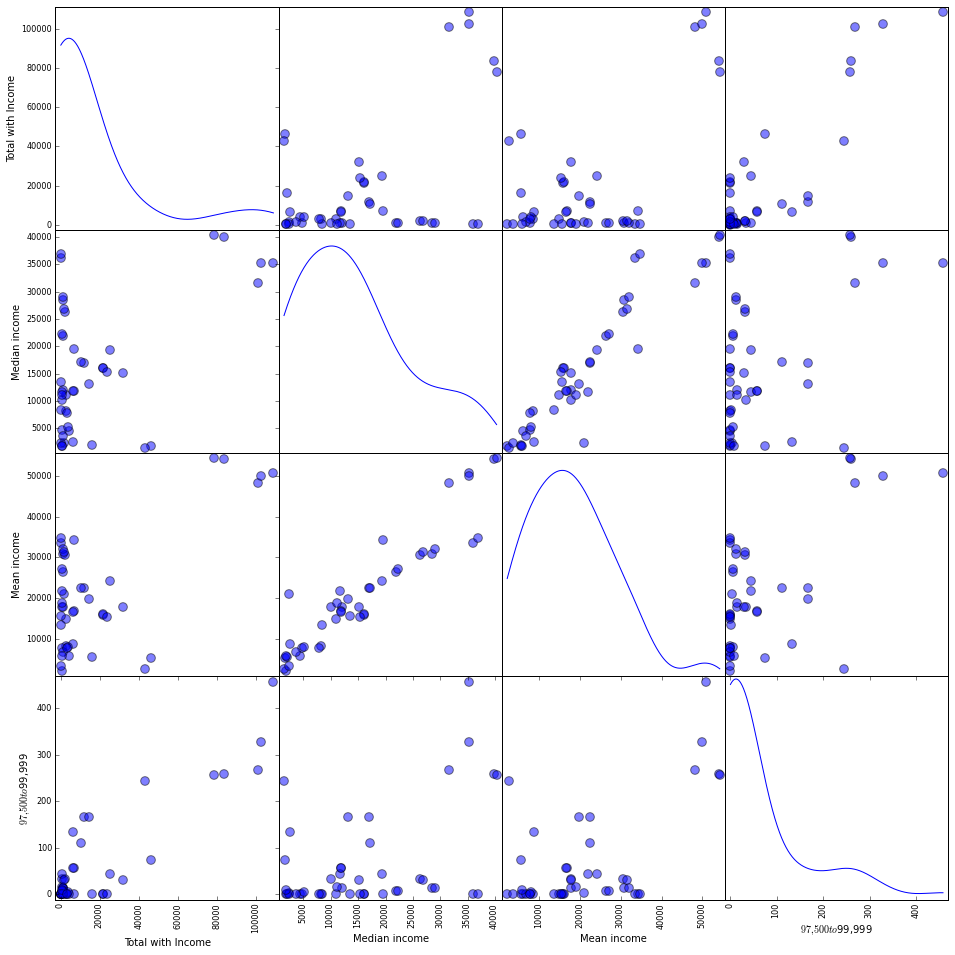

In [8]:
#lest see what is in the data
from pandas.tools.plotting import scatter_matrix
datam = pd.DataFrame(allmales['all'])
datam = pd.DataFrame(datam, columns=['Total with Income', 'Median income', 'Mean income','$97,500 to $99,999'])
scatter_matrix(datam, s=300, figsize=(16, 16), diagonal='kde')

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

median.

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

In [9]:
print allmales['all']['Median income'][:10]

0      NaN
1    35228
2    39903
3    40298
4    19557
5     2359
6    15974
7     8232
8     1829
9    11010
Name: Median income, dtype: float64


In [10]:
allmales['all']['Median income'][1]

35228.0

In [11]:
# Total Median Income of males
ma = allmales['all']['Median income'][1]
mw = allmales['white']['Median income'][1]
mb = allmales['black']['Median income'][1]
mh = allmales['hispanic']['Median income'][1]
mas = allmales['asian']['Median income'][1]

# Total Median Income of females
fa = allfemales['all']['Median income'][1]
fw = allfemales['white']['Median income'][1]
fb = allfemales['black']['Median income'][1]
fh = allfemales['hispanic']['Median income'][1]
fas = allfemales['asian']['Median income'][1]

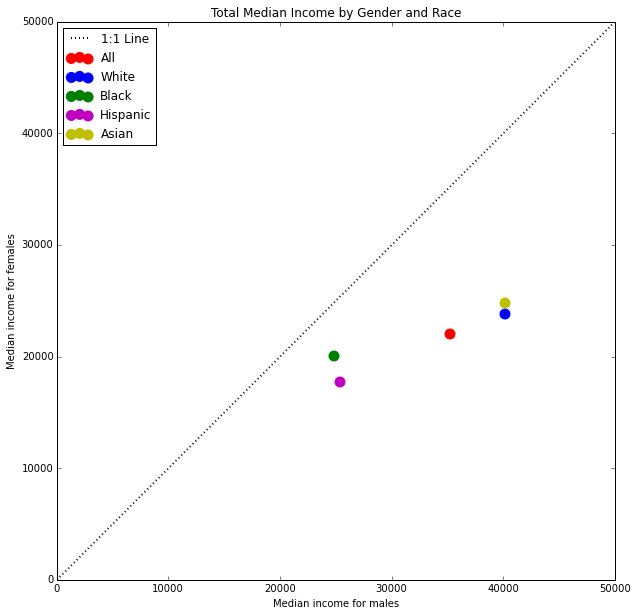

In [12]:
pl.figure(figsize=(10,10))
pl.scatter(ma, fa, s=100, color='r', label='All')
pl.scatter(mw, fw, s=100, color='b', label='White')
pl.scatter(mb, fb, s=100, color='g', label='Black')
pl.scatter(mh, fh, s=100, color='m', label='Hispanic')
pl.scatter(mas, fas, s=100, color='y', label='Asian')
pl.plot([0,50000], [0,50000], label="1:1 Line", linewidth=2.0, color='k', linestyle=':')
pl.title('Total Median Income by Gender and Race')
pl.xlabel('Median income for males')
pl.ylabel('Median income for females')
plt.xlim(0,50000)
plt.ylim(0,50000)
pl.legend(loc='upper left')


# It is clearly shown that males earn more median income than females since all the dots lie beneath the equality 1:1 line.

In [13]:
# Median - Median Income of males

#one data point per race
#mam = np.mean(allmales['all']['Median income'])
#mwm = np.mean(allmales['white']['Median income'])
#mbm = np.mean(allmales['black']['Median income'])
#mhm = np.mean(allmales['hispanic']['Median income'])
#masm = np.mean(allmales['asian']['Median income'])

#print mam

In [14]:
# Median - Median Income of females
#fam = np.mean(allfemales['all']['Median income'])
#fwm = np.mean(allfemales['white']['Median income'])
#fbm = np.mean(allfemales['black']['Median income'])
#fhm = np.mean(allfemales['hispanic']['Median income'])
#fasm = np.mean(allfemales['asian']['Median income'])

In [15]:
#pl.figure(figsize=(10,10))
#pl.scatter(mam, fam, s=60, color='r', label='All')
#pl.scatter(mwm, fwm, s=60, color='b', label='White')
#pl.scatter(mbm, fbm, s=60, color='g', label='Black')
#pl.scatter(mhm, fhm, s=60, color='m', label='Hispanic')
#pl.scatter(masm, fasm, s=60, color='c', label='Asian')
#pl.plot([0,30000], [0,30000], label="1:1 Line", linewidth=2.0, alpha=0.6, color='k')
#pl.title('Median - Median Income by Gender and Race')
#pl.xlabel('Median income for males')
#pl.ylabel('Median income for females')
#pl.legend()
#pl.xlim(0,30000)
#pl.ylim(0,30000)

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [16]:
#fit and plot here
m = [ma, mw, mb, mh, mas]
f = [fa, fw, fb, fh, fas]

X = sm.add_constant(m)
model = smf.OLS(f, X)
fit = model.fit()
print fit.summary()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 19 Oct 2015   Prob (F-statistic):             0.0176
Time:                        01:56:45   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

/Users/lucyy/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [17]:
#slope, intercept = np.polyfit(np.log(length), np.log(time), 1)

#slope and intercept
newx = fit.params[1], fit.params[0]
print newx

(0.35314068346940897, 9989.844408391913)


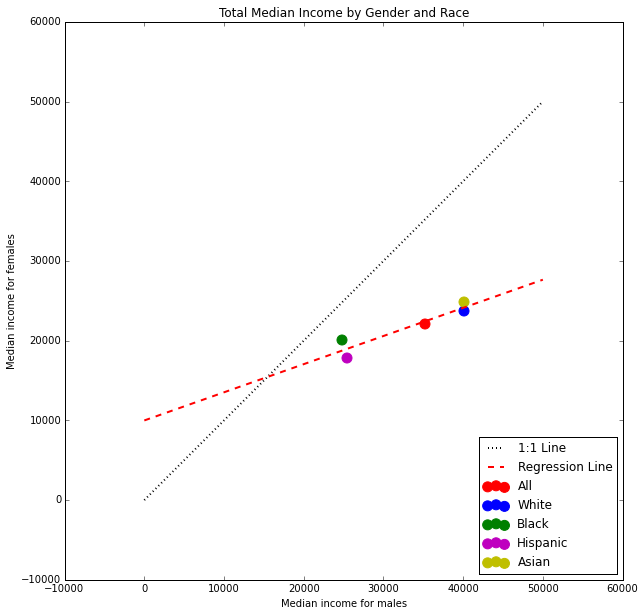

In [18]:
pl.figure(figsize=(10,10))
pl.scatter(ma, fa, s=100, color='r', label='All')
pl.scatter(mw, fw, s=100, color='b', label='White')
pl.scatter(mb, fb, s=100, color='g', label='Black')
pl.scatter(mh, fh, s=100, color='m', label='Hispanic')
pl.scatter(mas, fas, s=100, color='y', label='Asian')

pl.title('Total Median Income by Gender and Race')
pl.xlabel('Median income for males')
pl.ylabel('Median income for females')
pl.plot([0,50000], [0,50000], label="1:1 Line", linestyle=':', linewidth=2.0, color='k')

X = arange(0, 50000, 1)
Y1 = fit.params[0] + fit.params[1]*X

pl.plot(X, Y1, label="Regression Line", color = 'r', linewidth=2.0, linestyle='--')
pl.legend(loc='lower right')

#pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)
#pl.plot(newx,np.poly1d(np.ployfit(m,f,1))(newx)
#fit1 = np.ployfit(m,f,1)
#print fit1
#pl.plot(newx,np.poly1d(fit1))(newx)

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [19]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
import scipy.stats as stats

cor = stats.spearmanr(m, f)
#m.std()/f.std()
beta1=cor[0]*np.std(f)/np.std(m)
beta0=np.mean(f)-beta1*np.mean(m)

print beta1, beta0

0.338176888526 10485.9510732


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

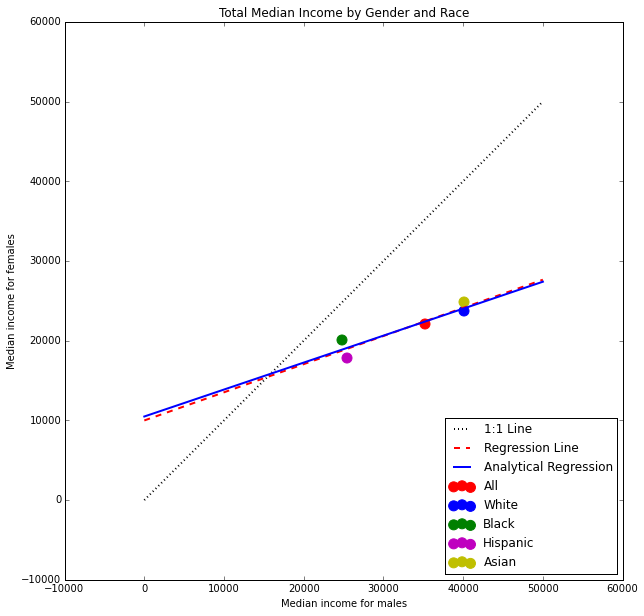

In [20]:
pl.figure(figsize=(10,10))
pl.scatter(ma, fa, s=100, color='r', label='All')
pl.scatter(mw, fw, s=100, color='b', label='White')
pl.scatter(mb, fb, s=100, color='g', label='Black')
pl.scatter(mh, fh, s=100, color='m', label='Hispanic')
pl.scatter(mas, fas, s=100, color='y', label='Asian')

pl.title('Total Median Income by Gender and Race')
pl.xlabel('Median income for males')
pl.ylabel('Median income for females')
pl.plot([0,50000], [0,50000], label="1:1 Line", linestyle=':', linewidth=2.0, color='k')

X = arange(0, 50000, 1)
Y1 = fit.params[0] + fit.params[1]*X

pl.plot(X, Y1, label="Regression Line", color='r', linewidth=2.0, linestyle='--')
pl.plot([0, 50000], [0*beta1+beta0, 50000*beta1+beta0], linewidth=2.0, label = "Analytical Regression")

pl.legend(loc='lower right')

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [21]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

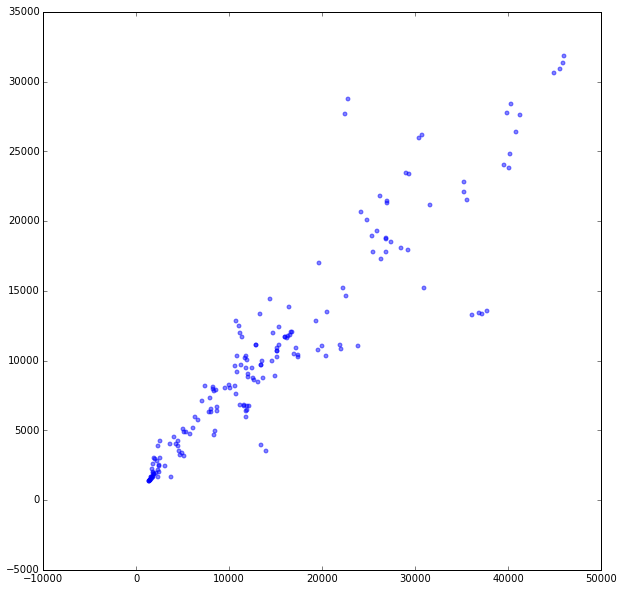

In [22]:
#fit and plot [...]
pl.figure(figsize=(10,10))
pl.scatter(all_males,all_females, alpha=.5, s=15,color = 'b')

In [23]:
m, b = np.polyfit(~np.isnan(all_males), ~np.isnan(all_females), deg=1)
print m, b

0.843645337564 0.129032258065


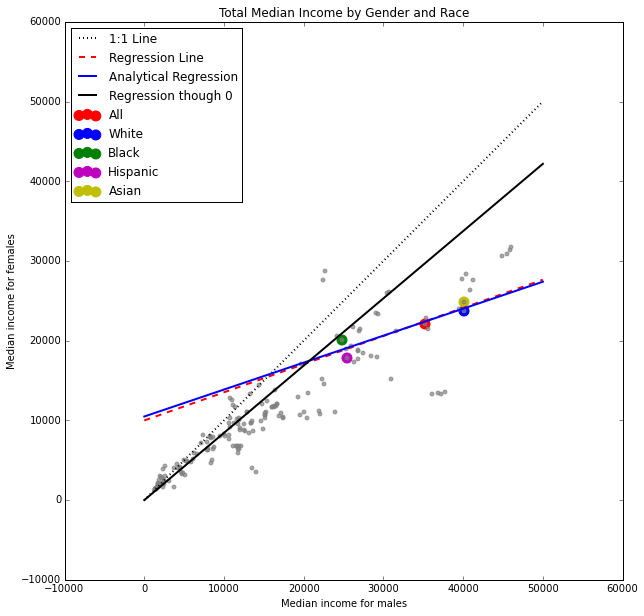

In [24]:
pl.figure(figsize=(10,10))
pl.scatter(ma, fa, s=100, color='r', label='All')
pl.scatter(mw, fw, s=100, color='b', label='White')
pl.scatter(mb, fb, s=100, color='g', label='Black')
pl.scatter(mh, fh, s=100, color='m', label='Hispanic')
pl.scatter(mas, fas, s=100, color='y', label='Asian')

pl.title('Total Median Income by Gender and Race')
pl.xlabel('Median income for males')
pl.ylabel('Median income for females')
pl.plot([0,50000], [0,50000], label="1:1 Line", linestyle=':', linewidth=2.0, color='k')

#regression line
X = arange(0, 50000, 1)
Y1 = fit.params[0] + fit.params[1]*X
pl.plot(X, Y1, label="Regression Line", color='r', linewidth=2.0, linestyle='--')

#analytical line
pl.plot([0, 50000], [0*beta1+beta0, 50000*beta1+beta0], linewidth=2.0, label = "Analytical Regression")


#regression through 0
Y2 = m*X + b
pl.plot(X, Y2, label="Regression though 0", color='k', linewidth=2.0)

pl.legend(loc='upper left')

pl.scatter(all_males,all_females, alpha=.7, s=15, color = 'grey')

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



In [25]:
# Ideal stipend
ideal_S = 100000
woman_S = ideal_S*m+b
print "If men makes $100,000 annually, women in the same position will make $",woman_S

If men makes $100,000 annually, women in the same position will make $ 84364.6627886


##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

# Asians make more money than other races, about 40k for males, 25k for females. White men makes about the same as Asian men but White women makes a little under Asian women. Hispanics men makes more than Black men, while black women makes more than Hispanics women, makeing them having the least median income. 